In [121]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, uniform

In [122]:
norm.var(loc=0,scale=2) # scale = standard deviation, loc=mean!

4.0

In [123]:
x = uniform.rvs(loc=0,scale=4,size=1000)
y = norm.rvs(loc=1+2*x,scale=0.2+0.5*x) # Standard deviation is a linear function of X, not the variance!!

X = np.hstack([np.full((x.shape[0],1),1),x.reshape(-1,1)])
T_mean = np.array([[0],[1]])
T_std = np.array([[0.1],[0.1]])
Y = y.reshape(-1,1)

In [124]:
def LL(X,Y,T_mean,T_std):
    S = (X@T_std)
    M = (X@T_mean)
    return -(((Y-M)**2)/(2*S**2) + np.log(S)).mean()

def grad_LL_var(X,Y,T_mean,T_std):
    S = (X@T_std)
    M = (X@T_mean)
    return X.T@(((Y-M)**2 - S**2)/(S**3))

def grad_LL_mean(X,Y,T_mean,T_std):
    S = (X@T_std)
    M = (X@T_mean)
    return X.T@((Y-M)/(S**2))

# cool.

def grad_desc(X,Y,T_mean,T_std,eta_mean=0.001,eta_std=0.001,n_iter=100000,conv_mean=0.01,conv_std=0.01):
    
    i = 0
    new_T_mean = T_mean
    new_T_std = T_std
    while i < n_iter:
        new_T_mean = T_mean + eta_mean*grad_LL_mean(X,Y,T_mean,T_std)
        new_T_std = T_std + eta_std*grad_LL_var(X,Y,T_mean,T_std)
        
        if ((np.abs(new_T_mean-T_mean)).max() < conv_mean and (np.abs(new_T_std-T_std)).max() < conv_std):
            break
            
        T_mean = new_T_mean
        T_std = new_T_std
        
        i += 1
        
    print(f"Converged in {i} steps")
    
    return (new_T_mean, np.abs(new_T_std)) # if we don't take abs, this can give negative values (which we should ignore)

In [125]:
(est_T_mean,est_T_std) = grad_desc(X,Y,T_mean,T_std,eta_mean=0.0001,eta_std=0.0001,n_iter=100000,conv_mean=0.00001,conv_std=0.00001)
print(est_T_mean,est_T_std)

Converged in 34754 steps
[[0.97790858]
 [2.01293302]] [[0.2009427 ]
 [0.51688199]]


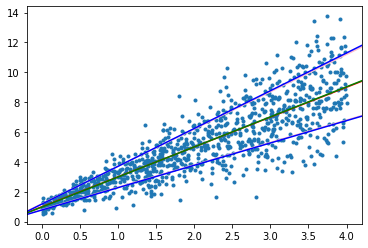

In [126]:
plt.scatter(x,y,marker='.')
plt.axline((0,1),slope=2,color='r')
plt.axline((0,1.2),slope=2.5,color='pink')
plt.axline((0,0.8),slope=1.5,color='pink')
plt.axline((0,est_T_mean[0][0]), slope=est_T_mean[1][0], color='g')
plt.axline((0,est_T_mean[0][0]+est_T_std[0][0]), slope=est_T_std[1][0]+est_T_mean[1][0], color='b')
plt.axline((0,est_T_mean[0][0]-est_T_std[0][0]), slope=est_T_mean[1][0]-est_T_std[1][0], color='b')

Perfect!